In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer_df = pd.read_csv(os.path.join("data.csv"))
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [3]:
cancer_df.loc[(cancer_df.diagnosis == 'B'),'diagnosis']='Benign'
cancer_df.loc[(cancer_df.diagnosis == 'M'),'diagnosis']='Malignant'

In [4]:
cancer_df.rename(columns = {'id':'Paitent ID', 'diagnosis':'Diagnosis'
                            , 'radius_mean':'Radius (Mean)', 'texture_mean':'Texture (Mean)', 'perimeter_mean':'Perimeter (Mean)'
                           , 'area_mean':'Area (Mean)', 'smoothness_mean':'Smoothness (Mean)', 'compactness_mean':'Compactness (Mean)', 'concavity_mean':'Concavity (Mean)', 'concave points_mean':'Concave Points (Mean)'
                           , 'symmetry_mean':'Symmetry (Mean)', 'fractal_dimension_mean':'Fractal Dimension (Mean)'
                            , 'radius_se':'Radius (Standard Error)', 'texture_se':'Texture (Standard Error)', 'perimeter_se':'Perimeter (Standard Error)'
                            , 'area_se':'Area (Standard Error)', 'smoothness_se':'Smoothness (Standard Error)', 'compactness_se':'Compactness (Standard Error)', 'concavity_se':'Concavity (Standard Error)', 'concave points_se':'Concave Points (Standard Error)'
                            , 'symmetry_se':'Symmetry (Standard Error)', 'fractal_dimension_se':'Fractal Dimension (Standard Error)'
                            , 'radius_worst':'Radius (Worst)', 'texture_worst':'Texture (Worst)', 'perimeter_worst':'Perimeter (Worst)'
                           , 'area_worst':'Area (Worst)', 'smoothness_worst':'Smoothness (Worst)', 'compactness_worst':'Compactness (Worst)', 'concavity_worst':'Concavity (Worst)', 'concave points_worst':'Concave Points (Worst)'
                           , 'symmetry_worst':'Symmetry (Worst)', 'fractal_dimension_worst':'Fractal Dimension (Worst)'
                           }, inplace = True) 


In [5]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [6]:
cancer_df.to_csv(r"C:\Users\Magrathea\Documents\GIT_Hub\Projects\Final-Project\Cancer_Data.csv")
                 

In [7]:
X = cancer_df.drop("Diagnosis", axis=1)
y = cancer_df["Diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


# Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
classifier.fit(X_train, y_train)

C:\Users\Magrathea\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.40375586854460094
Testing Data Score: 0.44755244755244755


In [12]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant']
First 10 Actual labels: ['Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign']


In [100]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Malignant,Malignant
1,Malignant,Malignant
2,Malignant,Benign
3,Benign,Benign
4,Malignant,Benign
...,...,...
138,Benign,Malignant
139,Malignant,Benign
140,Malignant,Benign
141,Malignant,Benign


# KNN

In [13]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [14]:
y = cancer_df["Diagnosis"]
target_names = ["negative", "positive"]

In [15]:
X_df = cancer_df.drop("Diagnosis", axis =1)
X = X_df.drop("Paitent ID", axis =1)

X.head()

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.916
k: 3, Train/Test Score: 0.958/0.923
k: 5, Train/Test Score: 0.944/0.930
k: 7, Train/Test Score: 0.944/0.916
k: 9, Train/Test Score: 0.944/0.916
k: 11, Train/Test Score: 0.946/0.923
k: 13, Train/Test Score: 0.944/0.923
k: 15, Train/Test Score: 0.937/0.930
k: 17, Train/Test Score: 0.937/0.930
k: 19, Train/Test Score: 0.937/0.930


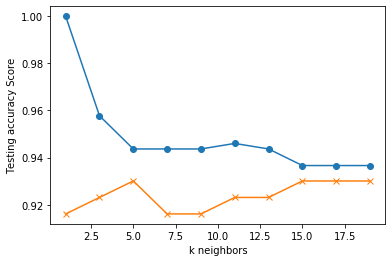

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.923


# Trees

In [104]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [105]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [106]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [107]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train_categorical)
clf.score(X_test, y_test_categorical)

0.9020979020979021

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train_categorical)
rf.score(X_test, y_test_categorical)

0.916083916083916

In [109]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.17364912937963653, 'Perimeter (Worst)'),
 (0.12198895784852827, 'Area (Worst)'),
 (0.11472964884800935, 'Concave Points (Worst)'),
 (0.10791822877720775, 'Radius (Worst)'),
 (0.08188362944791223, 'Concave Points (Mean)'),
 (0.06047526314303535, 'Concavity (Mean)'),
 (0.056725388774698814, 'Area (Mean)'),
 (0.04216071328748826, 'Perimeter (Mean)'),
 (0.041721200376517484, 'Area (Standard Error)'),
 (0.03915986596794634, 'Radius (Mean)'),
 (0.025436624677379446, 'Concavity (Worst)'),
 (0.019712429268053028, 'Radius (Standard Error)'),
 (0.017587447384719825, 'Compactness (Worst)'),
 (0.010329549281632773, 'Compactness (Mean)'),
 (0.010072685348864421, 'Symmetry (Worst)'),
 (0.009547168208132844, 'Texture (Worst)'),
 (0.009261714575672403, 'Texture (Mean)'),
 (0.007787629746063619, 'Smoothness (Worst)'),
 (0.007331423803633955, 'Fractal Dimension (Worst)'),
 (0.007113289494008737, 'Perimeter (Standard Error)'),
 (0.005262875335990815, 'Texture (Standard Error)'),
 (0.00447658435884404

# SVM

In [19]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [20]:
target = cancer_df["Diagnosis"]
target_names = ["negative", "positive"]

In [21]:
data_1 = cancer_df.drop("Diagnosis", axis =1)
data = data_1.drop("Paitent ID", axis =1)
feature_names = data.columns
data.head()

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.972


In [25]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.98        80
    positive       1.00      0.94      0.97        63

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# GridSearch

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [27]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [28]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [29]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\Magrathea\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.923, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.937, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.943, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.923, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.937, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.943, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.923, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.937, total=   0.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.943, total=   0.4s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   41.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [31]:
# List the best score
print(grid.best_score_)

0.9366197183098591


In [32]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [33]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.96      1.00      0.98        80
         red       1.00      0.95      0.98        63

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# NN

In [34]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [35]:
# Step 0: Reformat data
data = cancer_df.values
X = data[:, 2:35]
y = data[:, 1]

In [81]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [82]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [86]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [84]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [85]:
print(X_train.shape)

(426, 30)


In [41]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [87]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [88]:
from tensorflow.keras.layers import Dense
number_inputs = 30
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [95]:
number_classes = 2
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=number_classes, activation='softmax'))

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 124       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 14        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
print(X_train_scaled.shape)
print(y_train_categorical.shape)

(426, 30)
(426, 2)


In [99]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 426 samples
Epoch 1/1000
426/426 - 0s - loss: 0.6837 - accuracy: 0.6432
Epoch 2/1000
426/426 - 0s - loss: 0.6621 - accuracy: 0.6432
Epoch 3/1000
426/426 - 0s - loss: 0.6411 - accuracy: 0.6432
Epoch 4/1000
426/426 - 0s - loss: 0.6191 - accuracy: 0.6432
Epoch 5/1000
426/426 - 0s - loss: 0.5955 - accuracy: 0.6432
Epoch 6/1000
426/426 - 0s - loss: 0.5700 - accuracy: 0.6432
Epoch 7/1000
426/426 - 0s - loss: 0.5438 - accuracy: 0.6432
Epoch 8/1000
426/426 - 0s - loss: 0.5156 - accuracy: 0.8216
Epoch 9/1000
426/426 - 0s - loss: 0.4852 - accuracy: 1.0000
Epoch 10/1000
426/426 - 0s - loss: 0.4530 - accuracy: 1.0000
Epoch 11/1000
426/426 - 0s - loss: 0.4192 - accuracy: 1.0000
Epoch 12/1000
426/426 - 0s - loss: 0.3843 - accuracy: 1.0000
Epoch 13/1000
426/426 - 0s - loss: 0.3487 - accuracy: 1.0000
Epoch 14/1000
426/426 - 0s - loss: 0.3132 - accuracy: 1.0000
Epoch 15/1000
426/426 - 0s - loss: 0.2784 - accuracy: 1.0000
Epoch 16/1000
426/426 - 0s - loss: 0.2452 - accuracy: 1.0000
Epoch 17/100

Epoch 134/1000
426/426 - 0s - loss: 7.0894e-04 - accuracy: 1.0000
Epoch 135/1000
426/426 - 0s - loss: 6.9587e-04 - accuracy: 1.0000
Epoch 136/1000
426/426 - 0s - loss: 6.8309e-04 - accuracy: 1.0000
Epoch 137/1000
426/426 - 0s - loss: 6.7065e-04 - accuracy: 1.0000
Epoch 138/1000
426/426 - 0s - loss: 6.5863e-04 - accuracy: 1.0000
Epoch 139/1000
426/426 - 0s - loss: 6.4681e-04 - accuracy: 1.0000
Epoch 140/1000
426/426 - 0s - loss: 6.3545e-04 - accuracy: 1.0000
Epoch 141/1000
426/426 - 0s - loss: 6.2406e-04 - accuracy: 1.0000
Epoch 142/1000
426/426 - 0s - loss: 6.1318e-04 - accuracy: 1.0000
Epoch 143/1000
426/426 - 0s - loss: 6.0258e-04 - accuracy: 1.0000
Epoch 144/1000
426/426 - 0s - loss: 5.9214e-04 - accuracy: 1.0000
Epoch 145/1000
426/426 - 0s - loss: 5.8189e-04 - accuracy: 1.0000
Epoch 146/1000
426/426 - 0s - loss: 5.7195e-04 - accuracy: 1.0000
Epoch 147/1000
426/426 - 0s - loss: 5.6213e-04 - accuracy: 1.0000
Epoch 148/1000
426/426 - 0s - loss: 5.5267e-04 - accuracy: 1.0000
Epoch 149/

Epoch 259/1000
426/426 - 0s - loss: 1.2324e-04 - accuracy: 1.0000
Epoch 260/1000
426/426 - 0s - loss: 1.2187e-04 - accuracy: 1.0000
Epoch 261/1000
426/426 - 0s - loss: 1.2050e-04 - accuracy: 1.0000
Epoch 262/1000
426/426 - 0s - loss: 1.1918e-04 - accuracy: 1.0000
Epoch 263/1000
426/426 - 0s - loss: 1.1786e-04 - accuracy: 1.0000
Epoch 264/1000
426/426 - 0s - loss: 1.1655e-04 - accuracy: 1.0000
Epoch 265/1000
426/426 - 0s - loss: 1.1526e-04 - accuracy: 1.0000
Epoch 266/1000
426/426 - 0s - loss: 1.1402e-04 - accuracy: 1.0000
Epoch 267/1000
426/426 - 0s - loss: 1.1277e-04 - accuracy: 1.0000
Epoch 268/1000
426/426 - 0s - loss: 1.1154e-04 - accuracy: 1.0000
Epoch 269/1000
426/426 - 0s - loss: 1.1031e-04 - accuracy: 1.0000
Epoch 270/1000
426/426 - 0s - loss: 1.0910e-04 - accuracy: 1.0000
Epoch 271/1000
426/426 - 0s - loss: 1.0791e-04 - accuracy: 1.0000
Epoch 272/1000
426/426 - 0s - loss: 1.0672e-04 - accuracy: 1.0000
Epoch 273/1000
426/426 - 0s - loss: 1.0557e-04 - accuracy: 1.0000
Epoch 274/

Epoch 384/1000
426/426 - 0s - loss: 3.4883e-05 - accuracy: 1.0000
Epoch 385/1000
426/426 - 0s - loss: 3.4565e-05 - accuracy: 1.0000
Epoch 386/1000
426/426 - 0s - loss: 3.4241e-05 - accuracy: 1.0000
Epoch 387/1000
426/426 - 0s - loss: 3.3924e-05 - accuracy: 1.0000
Epoch 388/1000
426/426 - 0s - loss: 3.3615e-05 - accuracy: 1.0000
Epoch 389/1000
426/426 - 0s - loss: 3.3306e-05 - accuracy: 1.0000
Epoch 390/1000
426/426 - 0s - loss: 3.3007e-05 - accuracy: 1.0000
Epoch 391/1000
426/426 - 0s - loss: 3.2705e-05 - accuracy: 1.0000
Epoch 392/1000
426/426 - 0s - loss: 3.2394e-05 - accuracy: 1.0000
Epoch 393/1000
426/426 - 0s - loss: 3.2101e-05 - accuracy: 1.0000
Epoch 394/1000
426/426 - 0s - loss: 3.1813e-05 - accuracy: 1.0000
Epoch 395/1000
426/426 - 0s - loss: 3.1513e-05 - accuracy: 1.0000
Epoch 396/1000
426/426 - 0s - loss: 3.1226e-05 - accuracy: 1.0000
Epoch 397/1000
426/426 - 0s - loss: 3.0950e-05 - accuracy: 1.0000
Epoch 398/1000
426/426 - 0s - loss: 3.0652e-05 - accuracy: 1.0000
Epoch 399/

Epoch 509/1000
426/426 - 0s - loss: 1.1538e-05 - accuracy: 1.0000
Epoch 510/1000
426/426 - 0s - loss: 1.1444e-05 - accuracy: 1.0000
Epoch 511/1000
426/426 - 0s - loss: 1.1344e-05 - accuracy: 1.0000
Epoch 512/1000
426/426 - 0s - loss: 1.1257e-05 - accuracy: 1.0000
Epoch 513/1000
426/426 - 0s - loss: 1.1149e-05 - accuracy: 1.0000
Epoch 514/1000
426/426 - 0s - loss: 1.1073e-05 - accuracy: 1.0000
Epoch 515/1000
426/426 - 0s - loss: 1.0951e-05 - accuracy: 1.0000
Epoch 516/1000
426/426 - 0s - loss: 1.0887e-05 - accuracy: 1.0000
Epoch 517/1000
426/426 - 0s - loss: 1.0763e-05 - accuracy: 1.0000
Epoch 518/1000
426/426 - 0s - loss: 1.0709e-05 - accuracy: 1.0000
Epoch 519/1000
426/426 - 0s - loss: 1.0582e-05 - accuracy: 1.0000
Epoch 520/1000
426/426 - 0s - loss: 1.0529e-05 - accuracy: 1.0000
Epoch 521/1000
426/426 - 0s - loss: 1.0404e-05 - accuracy: 1.0000
Epoch 522/1000
426/426 - 0s - loss: 1.0352e-05 - accuracy: 1.0000
Epoch 523/1000
426/426 - 0s - loss: 1.0224e-05 - accuracy: 1.0000
Epoch 524/

Epoch 634/1000
426/426 - 0s - loss: 4.0867e-06 - accuracy: 1.0000
Epoch 635/1000
426/426 - 0s - loss: 4.0593e-06 - accuracy: 1.0000
Epoch 636/1000
426/426 - 0s - loss: 3.9781e-06 - accuracy: 1.0000
Epoch 637/1000
426/426 - 0s - loss: 3.9594e-06 - accuracy: 1.0000
Epoch 638/1000
426/426 - 0s - loss: 3.9487e-06 - accuracy: 1.0000
Epoch 639/1000
426/426 - 0s - loss: 3.9163e-06 - accuracy: 1.0000
Epoch 640/1000
426/426 - 0s - loss: 3.9154e-06 - accuracy: 1.0000
Epoch 641/1000
426/426 - 0s - loss: 3.8270e-06 - accuracy: 1.0000
Epoch 642/1000
426/426 - 0s - loss: 3.7985e-06 - accuracy: 1.0000
Epoch 643/1000
426/426 - 0s - loss: 3.7769e-06 - accuracy: 1.0000
Epoch 644/1000
426/426 - 0s - loss: 3.7540e-06 - accuracy: 1.0000
Epoch 645/1000
426/426 - 0s - loss: 3.7492e-06 - accuracy: 1.0000
Epoch 646/1000
426/426 - 0s - loss: 3.7112e-06 - accuracy: 1.0000
Epoch 647/1000
426/426 - 0s - loss: 3.6479e-06 - accuracy: 1.0000
Epoch 648/1000
426/426 - 0s - loss: 3.6101e-06 - accuracy: 1.0000
Epoch 649/

Epoch 759/1000
426/426 - 0s - loss: 1.4714e-06 - accuracy: 1.0000
Epoch 760/1000
426/426 - 0s - loss: 1.4711e-06 - accuracy: 1.0000
Epoch 761/1000
426/426 - 0s - loss: 1.4588e-06 - accuracy: 1.0000
Epoch 762/1000
426/426 - 0s - loss: 1.4291e-06 - accuracy: 1.0000
Epoch 763/1000
426/426 - 0s - loss: 1.4288e-06 - accuracy: 1.0000
Epoch 764/1000
426/426 - 0s - loss: 1.4283e-06 - accuracy: 1.0000
Epoch 765/1000
426/426 - 0s - loss: 1.4277e-06 - accuracy: 1.0000
Epoch 766/1000
426/426 - 0s - loss: 1.4277e-06 - accuracy: 1.0000
Epoch 767/1000
426/426 - 0s - loss: 1.4277e-06 - accuracy: 1.0000
Epoch 768/1000
426/426 - 0s - loss: 1.4028e-06 - accuracy: 1.0000
Epoch 769/1000
426/426 - 0s - loss: 1.3857e-06 - accuracy: 1.0000
Epoch 770/1000
426/426 - 0s - loss: 1.3855e-06 - accuracy: 1.0000
Epoch 771/1000
426/426 - 0s - loss: 1.3603e-06 - accuracy: 1.0000
Epoch 772/1000
426/426 - 0s - loss: 1.3110e-06 - accuracy: 1.0000
Epoch 773/1000
426/426 - 0s - loss: 1.3091e-06 - accuracy: 1.0000
Epoch 774/

Epoch 884/1000
426/426 - 0s - loss: 5.3112e-07 - accuracy: 1.0000
Epoch 885/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 886/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 887/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 888/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 889/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 890/1000
426/426 - 0s - loss: 5.3057e-07 - accuracy: 1.0000
Epoch 891/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 892/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 893/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 894/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 895/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 896/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 897/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 898/1000
426/426 - 0s - loss: 5.3001e-07 - accuracy: 1.0000
Epoch 899/

In [94]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.2645 - accuracy: 0.9650
Loss: 0.26450412269535967, Accuracy: 0.9650349617004395
